In [14]:
#STOCK PRICE PREDICTION USING MACHINE LEARNING LINEAR REGRESSION AND DECISION TREE MODEL

In [ ]:
# import libraries
import numpy as np

import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [15]:
from google.colab import files
uploaded = files.upload()

Saving tesla.csv to tesla.csv


In [16]:
df= pd.read_csv('tesla.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [17]:
df.shape

(2416, 7)

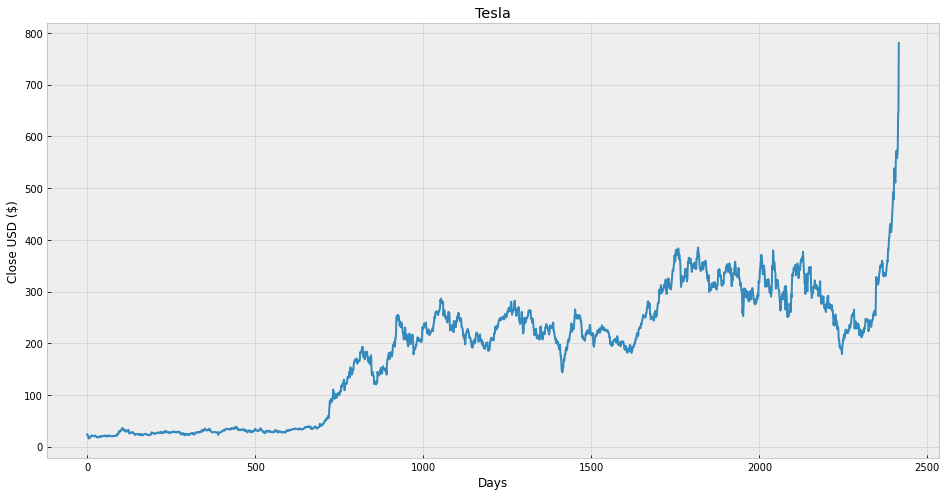

In [18]:
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Close USD ($)') 
plt.plot(df['Close'])
plt.show() 






In [19]:
df=df[['Close']]
df.head(4)

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001


In [20]:
future_days =25
df['Prediction']= df[['Close']].shift(-future_days)
df.tail(4) 

,Close,Prediction
2412,580.989990,NaN
2413,640.809998,NaN
2414,650.570007,NaN
2415,780.000000,NaN


In [21]:
X=np.array(df.drop(['Prediction'],1))[:-future_days] 
print(X)

[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [419.220001]
 [425.25    ]
 [430.940002]]


<ipython-input-21-6d809a07fb98>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=np.array(df.drop(['Prediction'],1))[:-future_days]


In [22]:
y=np.array(df['Prediction'])[:-future_days]
print(y)

[ 21.26      20.450001  19.59     ... 640.809998 650.570007 780.      ]


In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [34]:
x_train.shape

(1793, 1)

In [35]:
x_test.shape

(598, 1)

In [24]:
#Get the last  
x_future =df.drop(['Prediction'],1)[:-future_days]

x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-24-b5e1c927204a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future =df.drop(['Prediction'],1)[:-future_days]


array([[352.220001],
       [354.829987],
       [333.040009],
       [336.339996],
       [328.920013],
       [331.290009],
       [329.940002],
       [334.869995],
       [336.200012],
       [333.029999],
       [330.369995],
       [335.890015],
       [339.529999],
       [348.839996],
       [352.700012],
       [359.679993],
       [358.390015],
       [381.5     ],
       [378.98999 ],
       [393.149994],
       [404.040009],
       [405.589996],
       [419.220001],
       [425.25    ],
       [430.940002]])

In [25]:
#Create the models 
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train,y_train) 

In [26]:
# show the model tree prediction 
tree_prediction= tree.predict(x_future)
print(tree_prediction)
print()
# show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)


[419.220001 414.700012 418.329987 430.26001  443.01001  451.540009
 352.929993 492.140015 481.339996 478.149994 524.859985 481.339996
 316.049988 513.48999  510.5      347.26001  569.559998 329.920013
 564.820007 337.019989 566.900024 566.900024 640.809998 650.570007
 780.      ]

[357.60611415 360.213183   338.44755939 341.74385803 334.33216825
 336.69951534 335.35101722 340.27550003 341.60403049 338.43756057
 335.78052963 341.29437997 344.93029561 354.22988694 358.08558865
 365.05776821 363.76923201 386.85338727 384.34618268 398.49036022
 409.36820359 410.91645819 424.5312291  430.55448845 436.23813081]


<ipython-input-27-29e87679a42d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


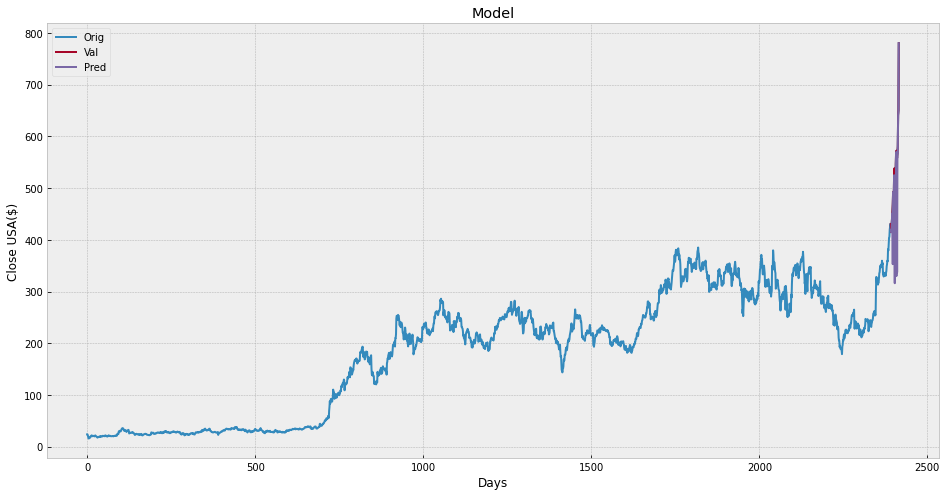

In [27]:
#visual the data
predictions = tree_prediction

valid= df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close USA($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

<ipython-input-28-2394b16117a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


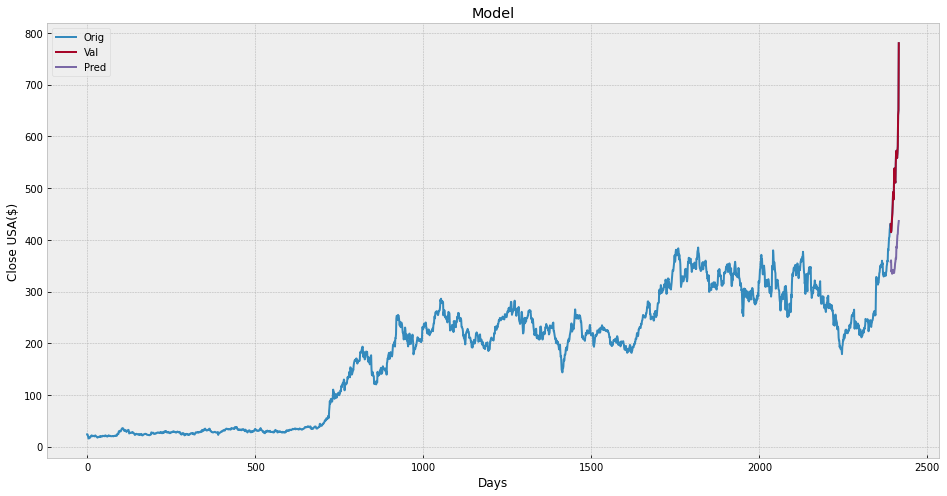

In [28]:
#visual the data
predictions = lr_prediction

valid= df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close USA($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [33]:
lr.score(x_train,y_train)

0.9231588723179124

In [38]:
tree.score(x_train,y_train)

0.9984202270453749

In [43]:
import pickle 
pickle.dump(tree,open('model.pkl','wb'))